"я не смог..." (  , да и спромышленностью тоже не очень( 
- но позже смогу!

In [9]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'# Установка уровня логирования TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [10]:
# Загрузка данных Oxford-IIIT Pet
dataset, info = tfds.load("oxford_iiit_pet", split="train", with_info=True)
print(info)

tfds.core.DatasetInfo(
    name='oxford_iiit_pet',
    full_name='oxford_iiit_pet/3.2.0',
    description="""
    The Oxford-IIIT pet dataset is a 37 category pet image dataset with roughly 200
    images for each class. The images have large variations in scale, pose and
    lighting. All images have an associated ground truth annotation of breed.
    """,
    homepage='http://www.robots.ox.ac.uk/~vgg/data/pets/',
    data_dir='/home/leto/tensorflow_datasets/oxford_iiit_pet/3.2.0',
    file_format=tfrecord,
    download_size=773.52 MiB,
    dataset_size=774.69 MiB,
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=string),
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=37),
        'segmentation_mask': Image(shape=(None, None, 1), dtype=uint8),
        'species': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
  

{'file_name': <tf.Tensor: shape=(), dtype=string, numpy=b'Sphynx_158.jpg'>, 'image': <tf.Tensor: shape=(500, 500, 3), dtype=uint8, numpy=
array([[[ 3,  3,  3],
        [ 5,  3,  4],
        [ 7,  5,  6],
        ...,
        [ 3,  1,  2],
        [ 3,  1,  2],
        [ 3,  1,  2]],

       [[ 4,  3,  1],
        [ 5,  3,  4],
        [ 5,  3,  4],
        ...,
        [ 6,  2,  3],
        [ 7,  3,  4],
        [ 8,  4,  5]],

       [[ 4,  3,  1],
        [ 5,  4,  2],
        [ 5,  3,  4],
        ...,
        [ 7,  3,  2],
        [ 8,  4,  3],
        [ 8,  4,  3]],

       ...,

       [[ 6, 10, 11],
        [ 6,  7,  9],
        [ 7,  8, 10],
        ...,
        [ 3,  4,  6],
        [ 3,  4,  6],
        [ 4,  5,  7]],

       [[ 8, 12, 13],
        [ 7,  8, 10],
        [ 8,  9, 11],
        ...,
        [ 4,  5,  9],
        [ 4,  5,  7],
        [ 4,  5,  7]],

       [[ 8, 12, 13],
        [ 7,  8, 10],
        [ 8,  9, 11],
        ...,
        [ 5,  6, 10],
        [ 5, 

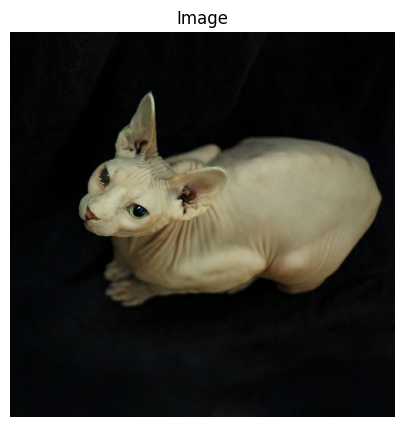

{'file_name': <tf.Tensor: shape=(), dtype=string, numpy=b'english_cocker_spaniel_135.jpg'>, 'image': <tf.Tensor: shape=(313, 500, 3), dtype=uint8, numpy=
array([[[  5,   9,   8],
        [  3,   4,   0],
        [ 11,  24,   4],
        ...,
        [  3,  15,   3],
        [  5,  15,   4],
        [  4,  14,   3]],

       [[  1,   1,   0],
        [  4,   7,   0],
        [ 12,  25,   8],
        ...,
        [  4,  14,   3],
        [  7,  15,   2],
        [  7,  15,   2]],

       [[  6,   5,   1],
        [  7,  15,   4],
        [ 11,  22,   8],
        ...,
        [  4,   9,   2],
        [  4,  11,   3],
        [  5,  13,   2]],

       ...,

       [[ 76,  98,  62],
        [132, 169,  99],
        [134, 181, 100],
        ...,
        [ 46,  76,  24],
        [ 78, 118,  45],
        [112, 171,  53]],

       [[  2,   1,   6],
        [122, 138,  93],
        [143, 192, 103],
        ...,
        [ 66, 106,  33],
        [ 76, 121,  40],
        [142, 199, 104]],

       [

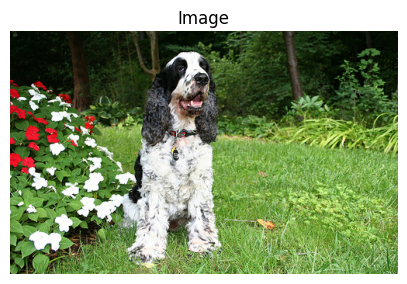

{'file_name': <tf.Tensor: shape=(), dtype=string, numpy=b'British_Shorthair_181.jpg'>, 'image': <tf.Tensor: shape=(500, 333, 3), dtype=uint8, numpy=
array([[[ 44,  32,   6],
        [ 44,  34,   7],
        [ 44,  34,   7],
        ...,
        [117,  83,  38],
        [119,  85,  40],
        [120,  85,  45]],

       [[ 41,  34,   6],
        [ 41,  34,   6],
        [ 42,  35,   7],
        ...,
        [116,  83,  38],
        [117,  84,  39],
        [117,  84,  41]],

       [[ 41,  36,   7],
        [ 41,  34,   6],
        [ 42,  35,   7],
        ...,
        [117,  84,  39],
        [118,  85,  40],
        [118,  87,  41]],

       ...,

       [[ 67,  15,  27],
        [ 62,  17,  24],
        [ 52,  11,  15],
        ...,
        [188,  71,  97],
        [199,  79, 107],
        [212,  89, 120]],

       [[ 70,  17,  27],
        [ 65,  18,  24],
        [ 57,  15,  19],
        ...,
        [181,  63,  89],
        [201,  81, 108],
        [212,  87, 119]],

       [[ 72,

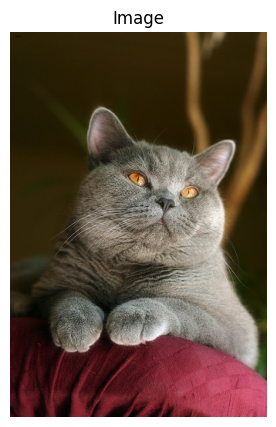

{'file_name': <tf.Tensor: shape=(), dtype=string, numpy=b'Siamese_161.jpg'>, 'image': <tf.Tensor: shape=(375, 500, 3), dtype=uint8, numpy=
array([[[108, 130, 117],
        [114, 133, 127],
        [108, 128, 117],
        ...,
        [  1,   0,   0],
        [  1,   0,   0],
        [  1,   1,   1]],

       [[ 79, 121, 101],
        [ 99, 123, 107],
        [ 99, 115, 104],
        ...,
        [  0,   1,   0],
        [  0,   1,   0],
        [  0,   2,   1]],

       [[ 88, 117, 112],
        [ 95, 115, 104],
        [106, 121, 114],
        ...,
        [  0,   3,   0],
        [  0,   2,   0],
        [  0,   1,   0]],

       ...,

       [[183, 178, 174],
        [189, 187, 174],
        [179, 176, 161],
        ...,
        [142, 127, 120],
        [132, 117, 110],
        [151, 137, 128]],

       [[180, 172, 170],
        [186, 182, 171],
        [183, 177, 165],
        ...,
        [140, 127, 119],
        [139, 126, 120],
        [141, 122, 116]],

       [[177, 169, 167]

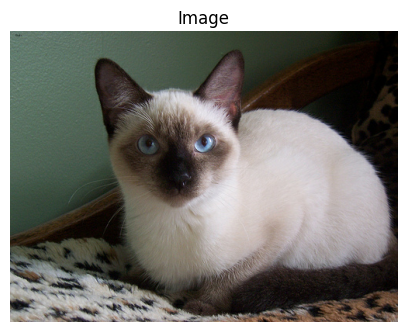

{'file_name': <tf.Tensor: shape=(), dtype=string, numpy=b'Sphynx_178.jpg'>, 'image': <tf.Tensor: shape=(500, 333, 3), dtype=uint8, numpy=
array([[[237, 228,  91],
        [236, 228,  93],
        [230, 225,  82],
        ...,
        [196, 164,  29],
        [198, 169,  31],
        [204, 177,  36]],

       [[232, 224,  87],
        [232, 226,  88],
        [229, 223,  85],
        ...,
        [195, 163,  26],
        [196, 167,  29],
        [202, 175,  36]],

       [[231, 223,  86],
        [232, 226,  86],
        [230, 224,  86],
        ...,
        [192, 160,  23],
        [196, 167,  29],
        [201, 174,  35]],

       ...,

       [[202, 213, 197],
        [213, 222, 203],
        [214, 226, 206],
        ...,
        [ 96,  82,  56],
        [ 89,  74,  51],
        [ 94,  79,  60]],

       [[208, 217, 200],
        [210, 219, 200],
        [213, 222, 203],
        ...,
        [ 82,  72,  47],
        [ 81,  69,  47],
        [ 88,  75,  56]],

       [[215, 224, 207],

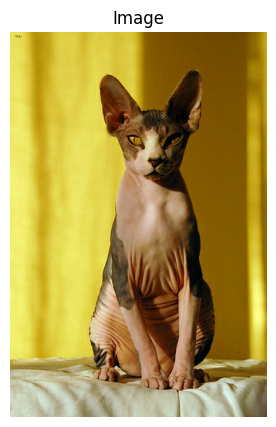

In [11]:
# Вывод первых нескольких примеров из набора данных и их изображений
for i, example in enumerate(dataset.take(5)):
    # Вывод информации о примере
    print(example)

    # Получение изображения
    image = example['image']

    # Визуализация изображения
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.title('Image')
    plt.axis('off')
    plt.show()

    # Остановка после первых 5 примеров, если нужно
    if i == 4:
        break

In [3]:
# Преобразование размера изображений
def preprocess_image(sample):
   image = sample["image"]
   image = tf.image.resize(image, (64, 64))
   image = tf.cast(image, tf.float32)
   image = image / 255.0
   return image

# Преобразование и подготовка датасета
dataset = dataset.map(lambda x: preprocess_image(x))

# Размер случайного вектора, из которого генерируются изображения
random_dim = 100
# Размеры изображений
img_size = (64, 64, 3)

In [4]:
# Создание генератора
def build_generator(random_dim):
   model = Sequential()
   model.add(Dense(256 * 8 * 8, input_shape=(random_dim,)))
   model.add(LeakyReLU(0.2))
   model.add(Reshape((8, 8, 256)))
   model.add(Conv2DTranspose(128, 4, strides=2, padding="same"))
   model.add(LeakyReLU(0.2))
   model.add(Conv2DTranspose(128, 4, strides=2, padding="same"))
   model.add(LeakyReLU(0.2))
   model.add(Conv2DTranspose(64, 4, strides=2, padding="same"))
   model.add(LeakyReLU(0.2))
   model.add(Conv2D(3, 5, padding="same", activation="tanh"))
   return model

# Создание дискриминатора
def build_discriminator():
   model = Sequential()
   model.add(Conv2D(64, 5, strides=2, padding="same", input_shape=img_size))
   model.add(LeakyReLU(0.2))
   model.add(Dropout(0.4))
   model.add(Conv2D(128, 5, strides=2, padding="same"))
   model.add(LeakyReLU(0.2))
   model.add(Dropout(0.4))
   model.add(Conv2D(256, 5, strides=2, padding="same"))
   model.add(LeakyReLU(0.2))
   model.add(Flatten())
   model.add(Dense(1, activation="sigmoid"))
   return model

# Создание GAN
def build_gan(generator, discriminator):
   model = Sequential()
   model.add(generator)
   model.add(discriminator)
   return model

# Генерация случайных шумов
def generate_random_data(size, random_dim):
   return np.random.normal(0, 1, size=[size, random_dim])

# Создание и компиляция моделей
generator = build_generator(random_dim)
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

discriminator.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0002, beta_1=0.5))
gan.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0002, beta_1=0.5))

# Функция для визуализации сгенерированных изображений
def visualize_generated_images(generator, random_dim, examples=8, figsize=(16, 16)):
   generated_images = generator.predict(generate_random_data(examples, random_dim))
   generated_images = 0.5 * generated_images + 0.5

   fig, axs = plt.subplots(nrows=2, ncols=4, figsize=figsize)
   for i in range(examples):
      row = i // 4
      col = i % 4
      ax = axs[row, col]
      ax.imshow(generated_images[i])
      ax.axis("off")
   plt.show()


# Функция для сохранения модели
def save_model(model, filename):
   model.save(filename + '.keras')

# Функция загрузки модели
def load_saved_model(filename):
   return load_model(filename + '.keras')

Training GAN:   0%|          | 0/15000 [00:00<?, ?it/s]WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
I0000 00:00:1710632310.847256   23393 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
Training GAN:   3%|▎         | 501/15000 [01:12<33:19,  7.25it/s] 

Epoch 500/15000, Discriminator Loss: 0.8517805635929108, GAN Loss: 0.5405045747756958


Training GAN:   7%|▋         | 999/15000 [02:19<29:19,  7.96it/s]

1/1 [==============================] - 1s 500ms/step


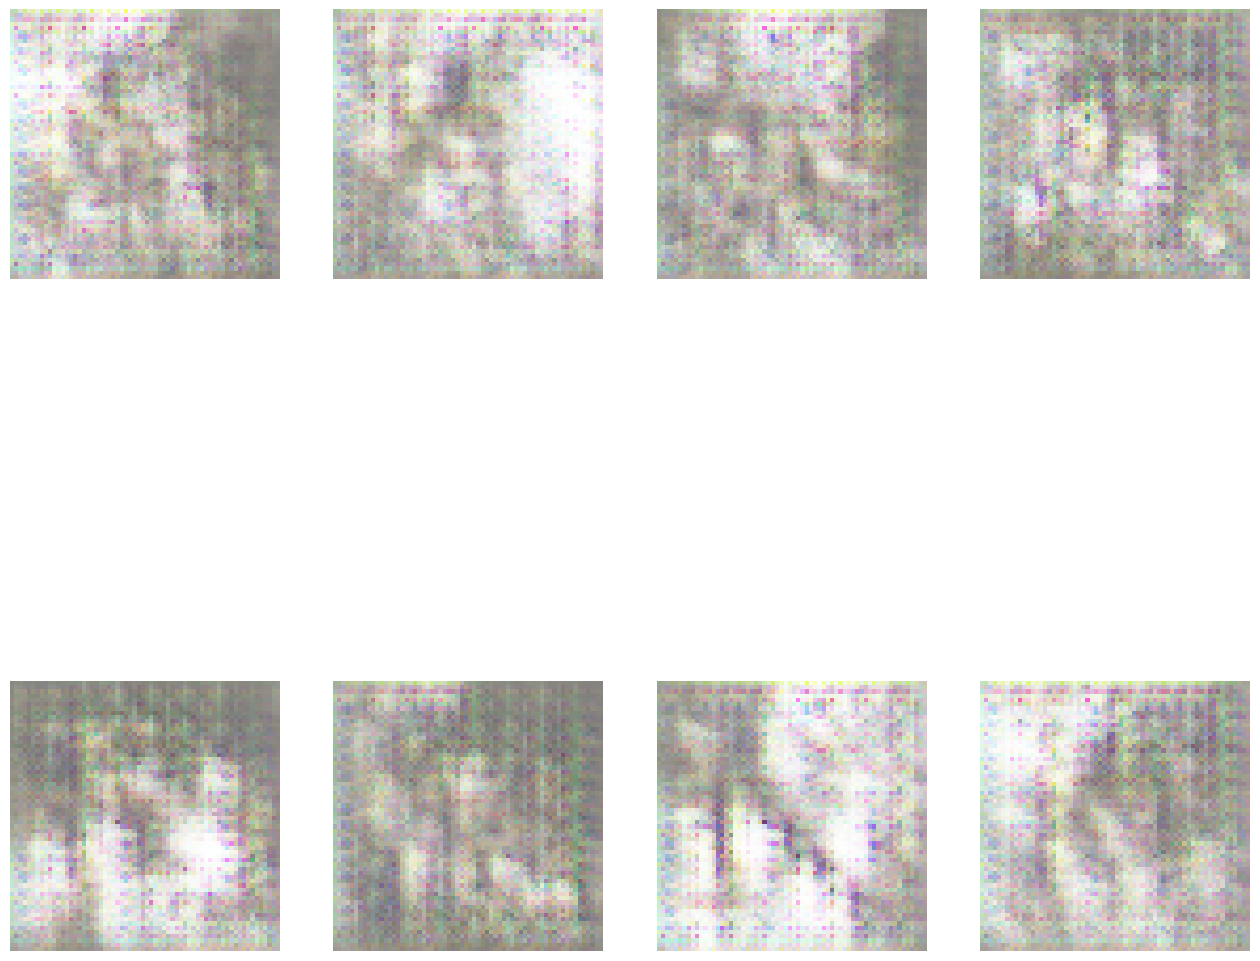

Training GAN:   7%|▋         | 1000/15000 [02:20<1:19:09,  2.95it/s]

Epoch 1000/15000, Discriminator Loss: 0.8466461971402168, GAN Loss: 0.46444016695022583


Training GAN:  10%|█         | 1501/15000 [03:23<28:17,  7.95it/s]  

Epoch 1500/15000, Discriminator Loss: 1.6302570337429643, GAN Loss: 1.0441606044769287


Training GAN:  13%|█▎        | 1999/15000 [04:26<30:16,  7.16it/s]

1/1 [==============================] - 0s 16ms/step


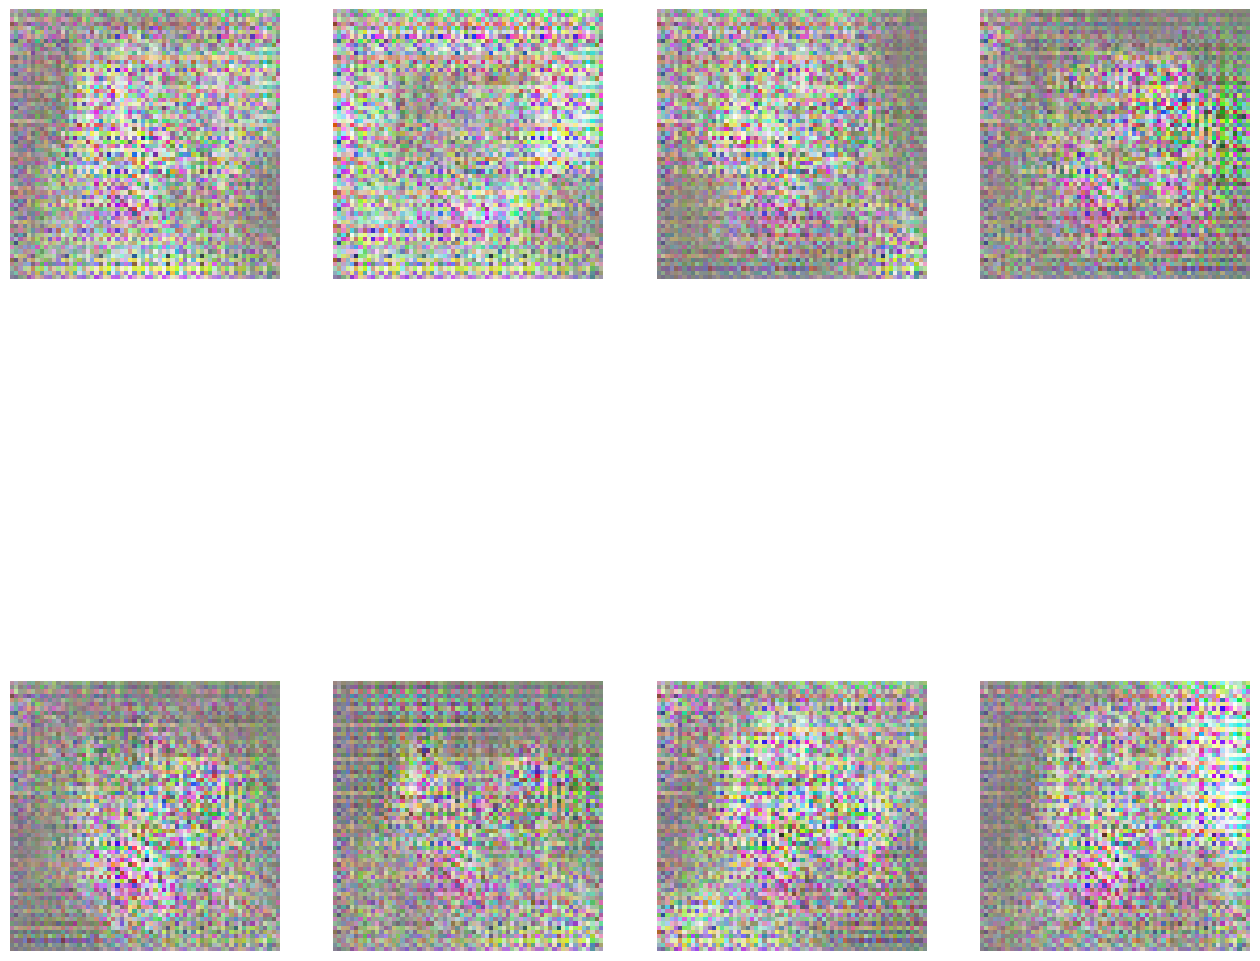

Training GAN:  13%|█▎        | 2000/15000 [04:26<43:11,  5.02it/s]

Epoch 2000/15000, Discriminator Loss: 0.7198188081383705, GAN Loss: 1.173810362815857


Training GAN:  17%|█▋        | 2501/15000 [05:33<28:26,  7.33it/s]

Epoch 2500/15000, Discriminator Loss: 0.7849270030856133, GAN Loss: 1.1383235454559326


Training GAN:  20%|█▉        | 2999/15000 [06:40<24:31,  8.16it/s]

1/1 [==============================] - 0s 13ms/step


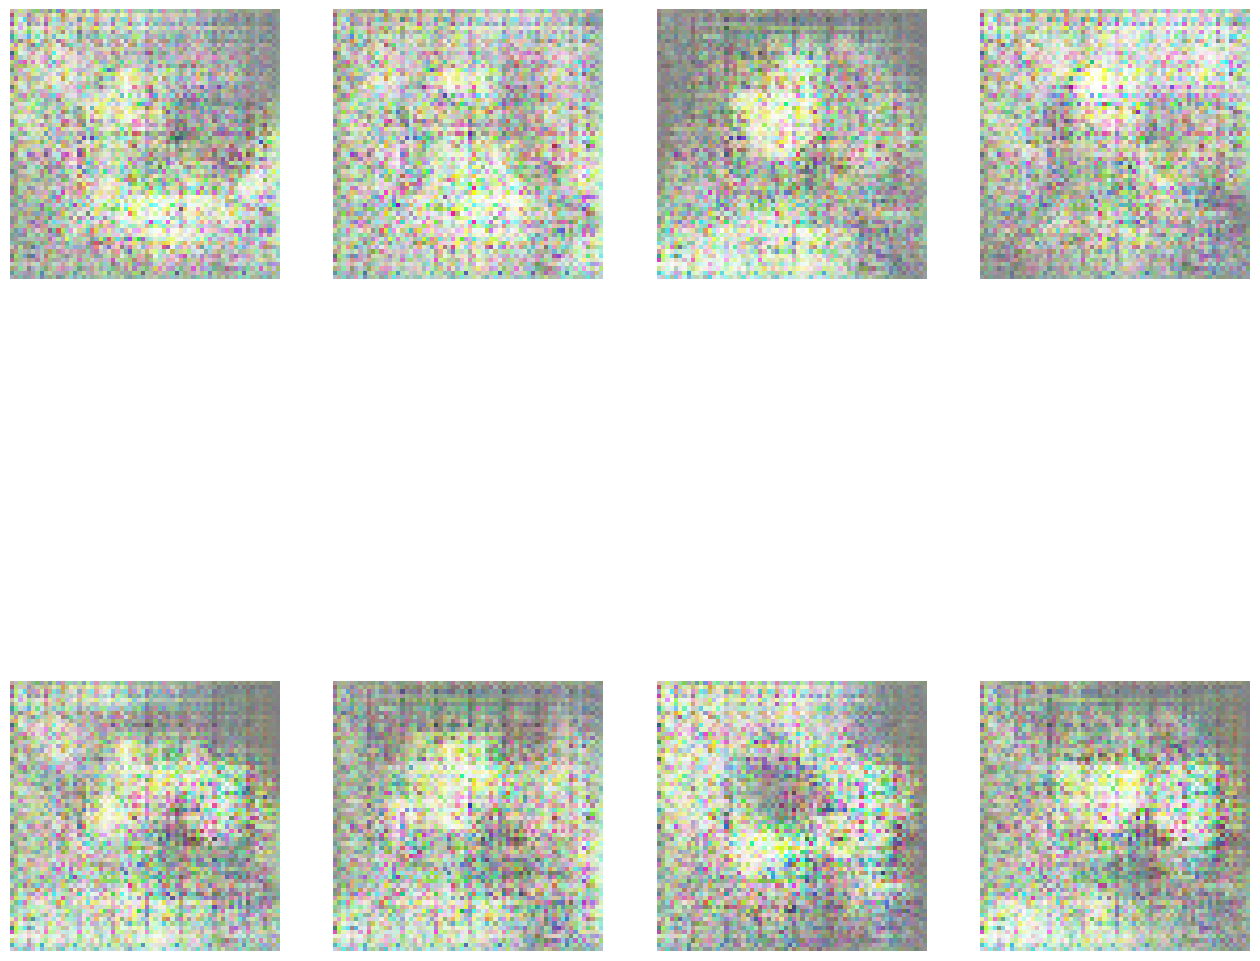

Training GAN:  20%|██        | 3000/15000 [06:40<35:19,  5.66it/s]

Epoch 3000/15000, Discriminator Loss: 1.0207789614796638, GAN Loss: 2.0756430625915527


Training GAN:  23%|██▎       | 3501/15000 [07:46<27:15,  7.03it/s]

Epoch 3500/15000, Discriminator Loss: 0.9783757850527763, GAN Loss: 2.0157904624938965


Training GAN:  27%|██▋       | 3999/15000 [08:50<22:34,  8.12it/s]

1/1 [==============================] - 0s 14ms/step


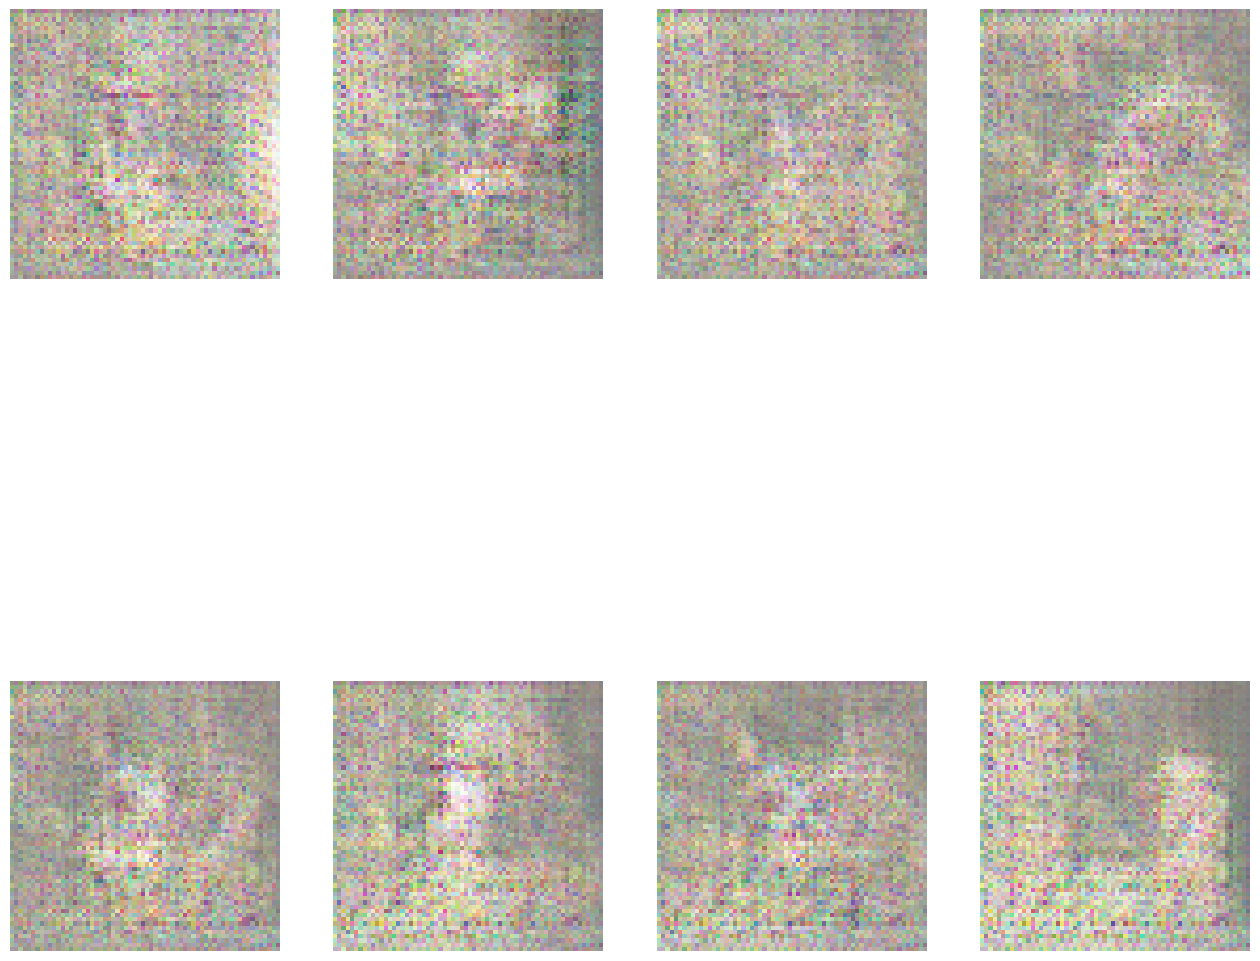

Training GAN:  27%|██▋       | 4000/15000 [08:50<32:24,  5.66it/s]

Epoch 4000/15000, Discriminator Loss: 1.0193027704954147, GAN Loss: 2.4401187896728516


Training GAN:  30%|███       | 4501/15000 [09:53<21:19,  8.21it/s]

Epoch 4500/15000, Discriminator Loss: 0.9533099699765444, GAN Loss: 3.222947597503662


Training GAN:  33%|███▎      | 4999/15000 [10:55<20:59,  7.94it/s]

1/1 [==============================] - 0s 13ms/step


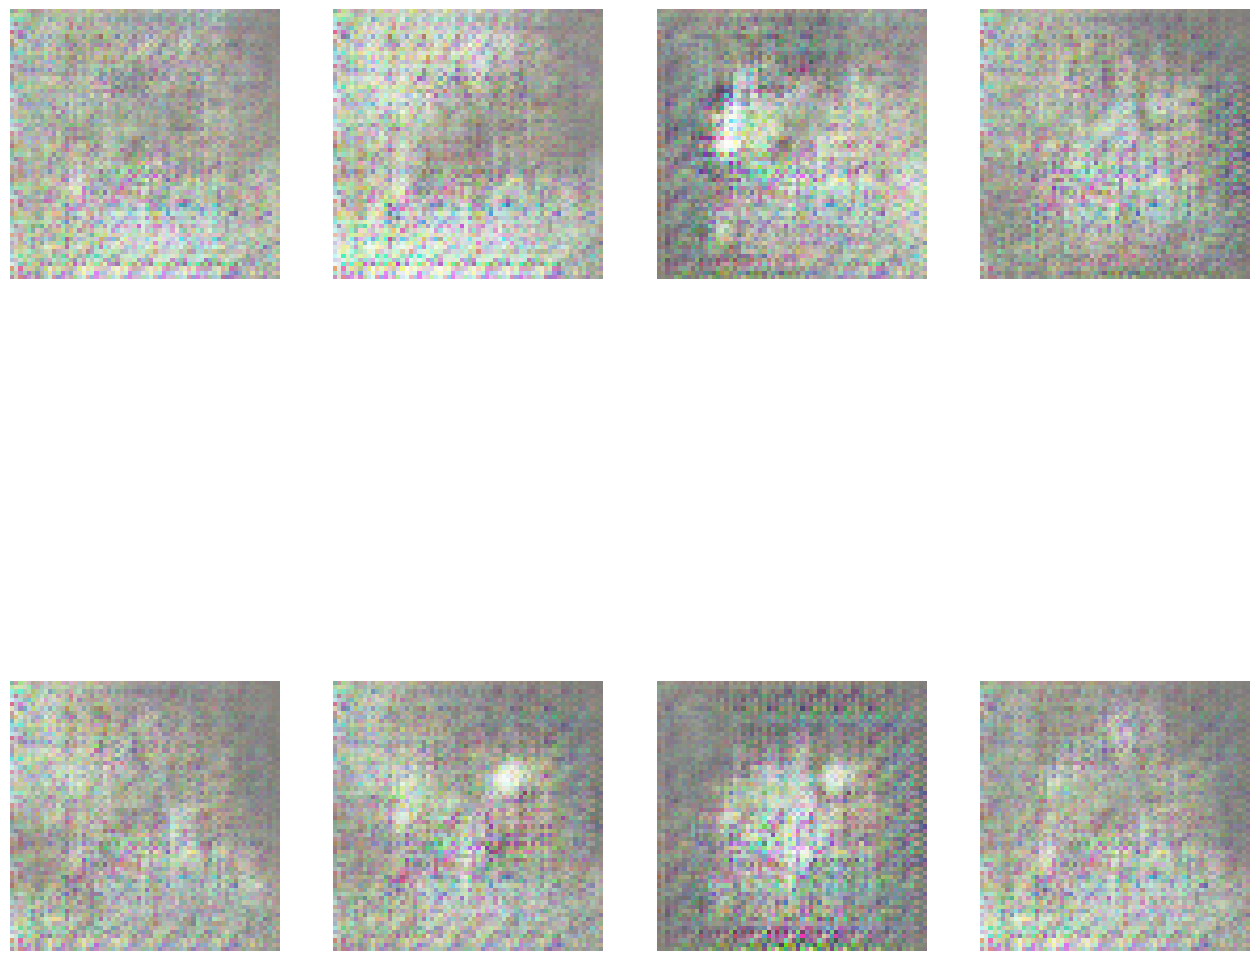

Training GAN:  33%|███▎      | 5000/15000 [10:55<29:33,  5.64it/s]

Epoch 5000/15000, Discriminator Loss: 1.1364510133862495, GAN Loss: 3.2764527797698975


Training GAN:  37%|███▋      | 5501/15000 [11:57<19:15,  8.22it/s]

Epoch 5500/15000, Discriminator Loss: 0.9246995523571968, GAN Loss: 3.3313450813293457


Training GAN:  40%|███▉      | 5999/15000 [13:00<19:06,  7.85it/s]

1/1 [==============================] - 0s 15ms/step


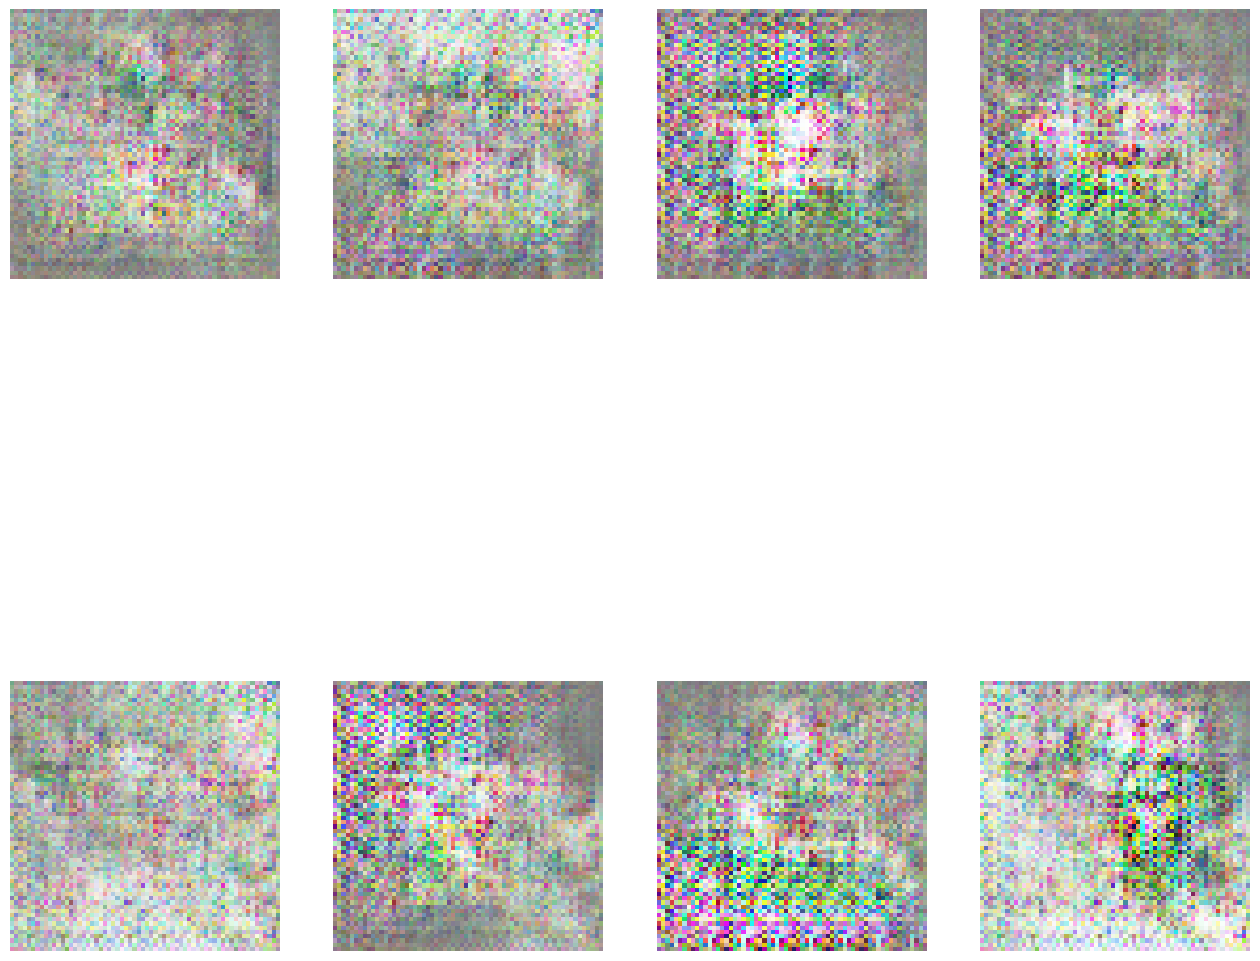

Training GAN:  40%|████      | 6001/15000 [13:01<36:16,  4.14it/s]

Epoch 6000/15000, Discriminator Loss: 1.2090881764888763, GAN Loss: 4.171076774597168


Training GAN:  43%|████▎     | 6501/15000 [14:05<19:06,  7.42it/s]

Epoch 6500/15000, Discriminator Loss: 1.0204777717590332, GAN Loss: 4.343395233154297


Training GAN:  47%|████▋     | 6999/15000 [15:11<16:35,  8.04it/s]

1/1 [==============================] - 0s 14ms/step


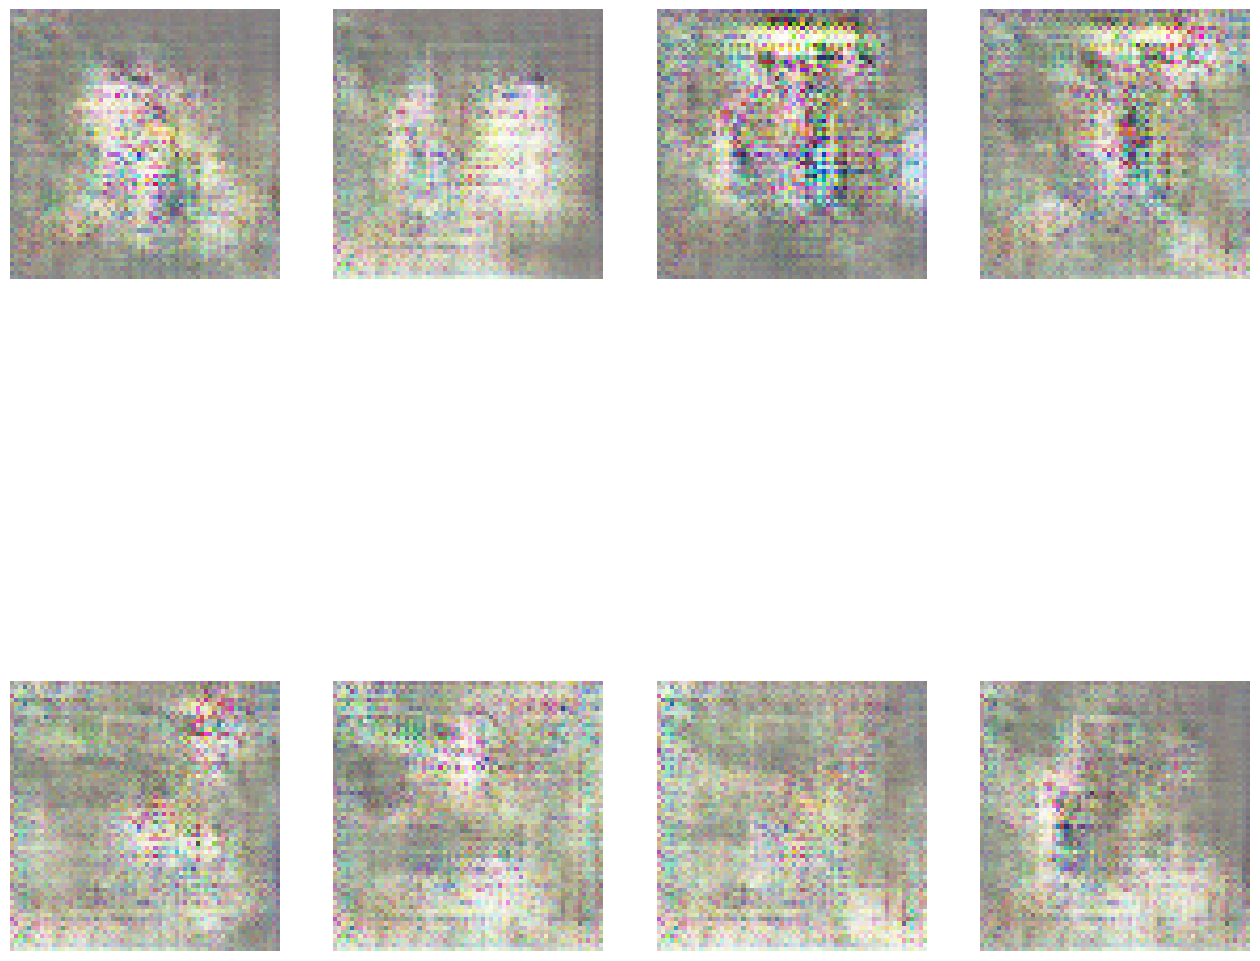

Training GAN:  47%|████▋     | 7000/15000 [15:11<26:31,  5.03it/s]

Epoch 7000/15000, Discriminator Loss: 0.7843445688486099, GAN Loss: 3.3555047512054443


Training GAN:  50%|█████     | 7501/15000 [16:17<15:43,  7.95it/s]

Epoch 7500/15000, Discriminator Loss: 5.629822731018066, GAN Loss: 10.518166542053223


Training GAN:  53%|█████▎    | 7999/15000 [17:23<15:39,  7.45it/s]

1/1 [==============================] - 0s 13ms/step


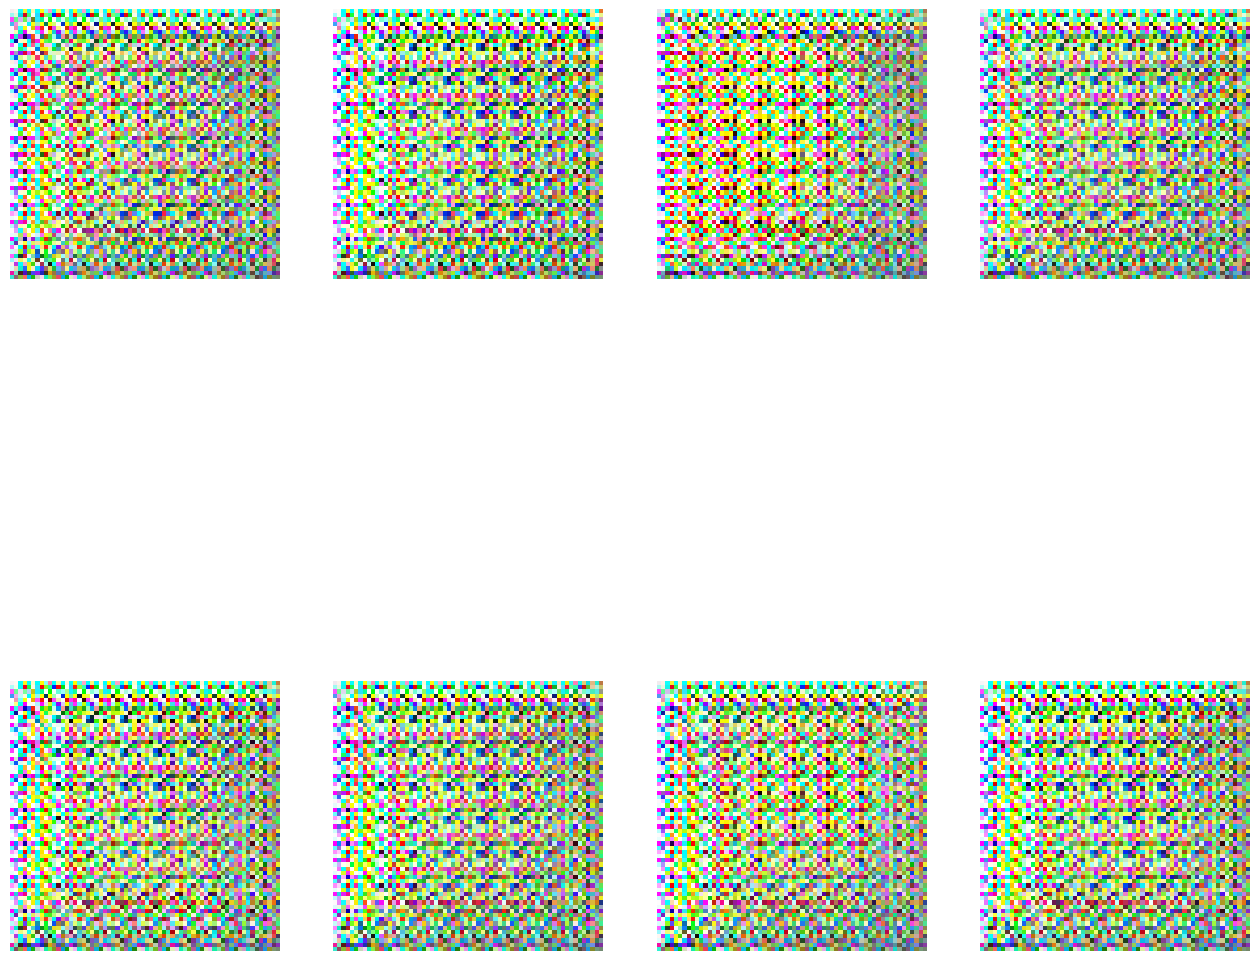

Training GAN:  53%|█████▎    | 8000/15000 [17:23<21:21,  5.46it/s]

Epoch 8000/15000, Discriminator Loss: 5.027212359011173, GAN Loss: 29.35909652709961


Training GAN:  57%|█████▋    | 8501/15000 [18:29<12:44,  8.50it/s]

Epoch 8500/15000, Discriminator Loss: 1.2328851176284843, GAN Loss: 11.362924575805664


Training GAN:  60%|█████▉    | 8999/15000 [19:30<11:53,  8.41it/s]

1/1 [==============================] - 0s 15ms/step


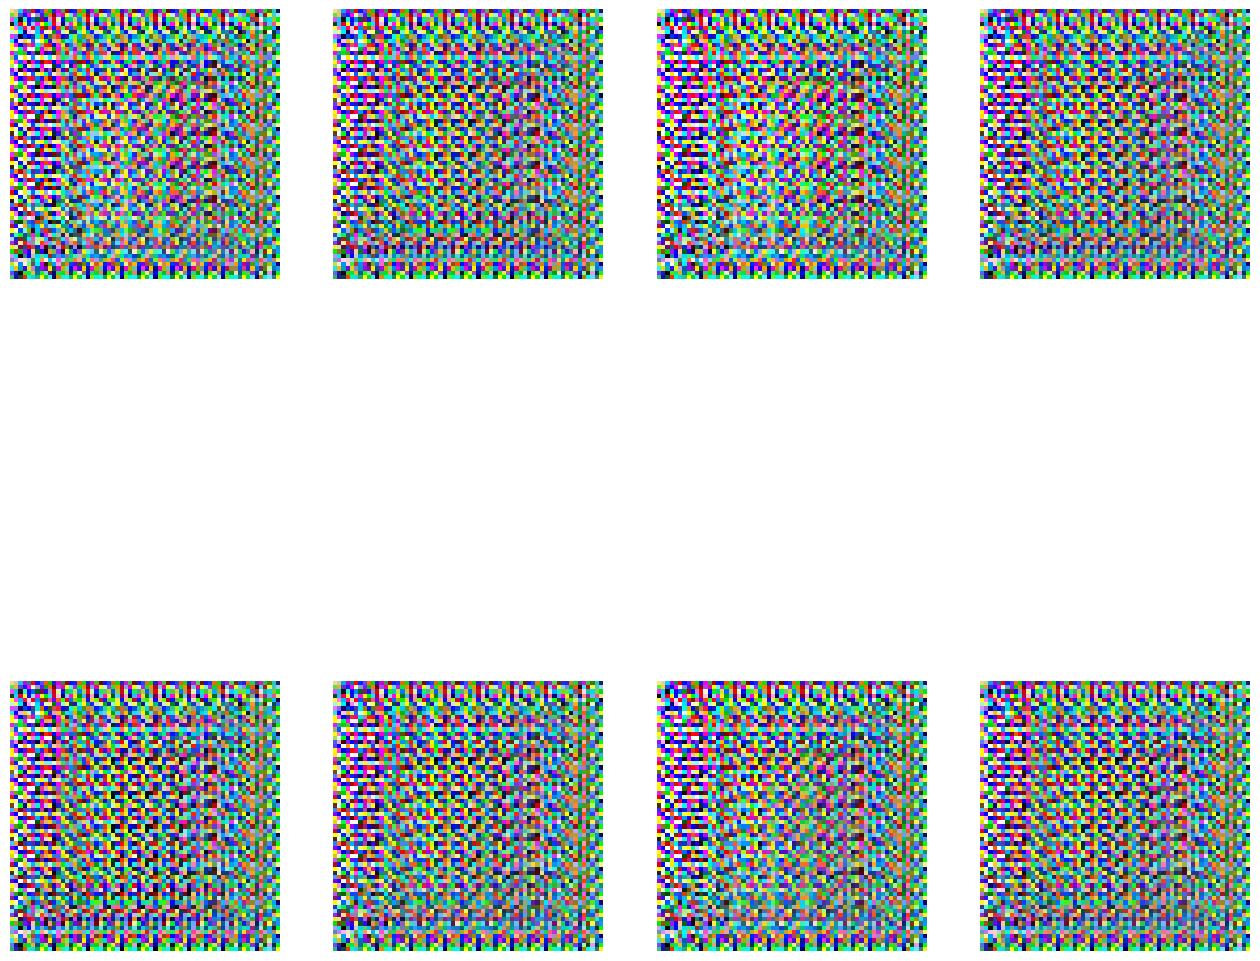

Training GAN:  60%|██████    | 9000/15000 [19:30<17:32,  5.70it/s]

Epoch 9000/15000, Discriminator Loss: 0.477426141500473, GAN Loss: 9.132848739624023


Training GAN:  63%|██████▎   | 9501/15000 [20:33<11:50,  7.74it/s]

Epoch 9500/15000, Discriminator Loss: 1.5142589807510376, GAN Loss: 13.597909927368164


Training GAN:  67%|██████▋   | 9999/15000 [21:40<10:50,  7.69it/s]

1/1 [==============================] - 0s 15ms/step


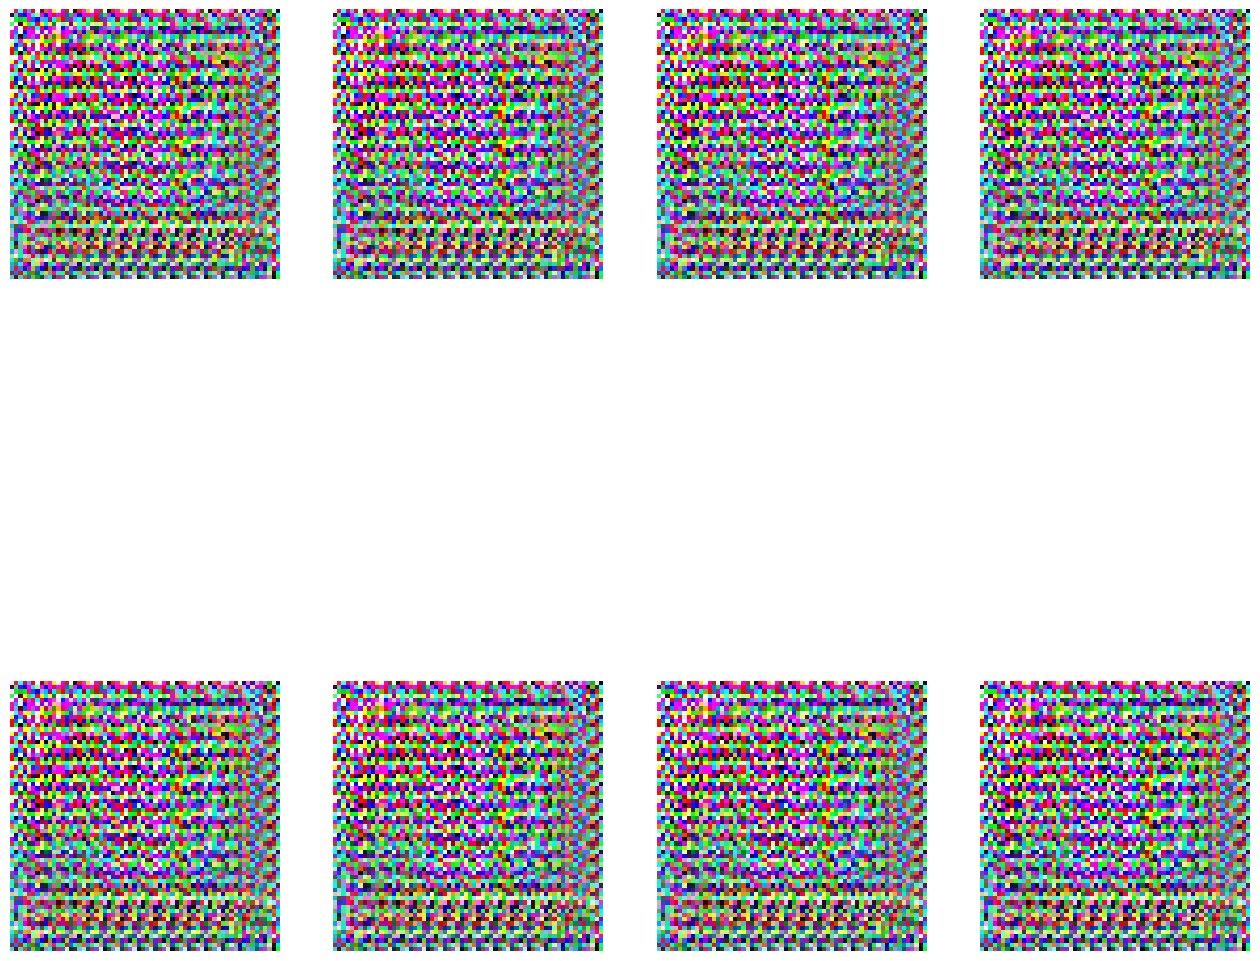

Training GAN:  67%|██████▋   | 10000/15000 [21:40<15:43,  5.30it/s]

Epoch 10000/15000, Discriminator Loss: 0.21232372522354126, GAN Loss: 16.851978302001953


Training GAN:  70%|███████   | 10501/15000 [22:46<09:20,  8.03it/s]

Epoch 10500/15000, Discriminator Loss: 0.0560247004032135, GAN Loss: 23.612201690673828


Training GAN:  73%|███████▎  | 10999/15000 [23:52<09:06,  7.32it/s]

1/1 [==============================] - 0s 14ms/step


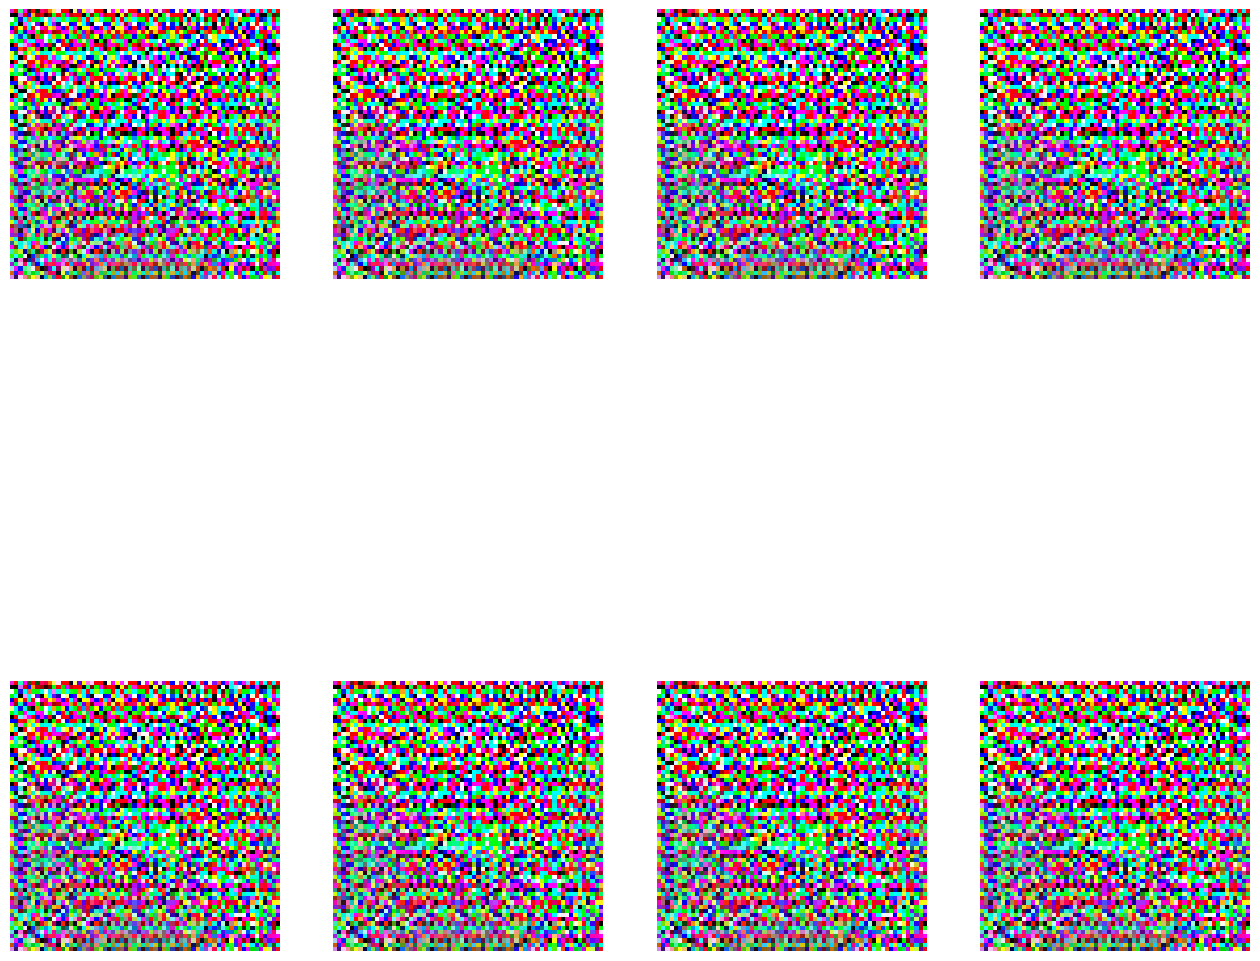

Training GAN:  73%|███████▎  | 11000/15000 [23:53<13:47,  4.83it/s]

Epoch 11000/15000, Discriminator Loss: 1.1080713272094727, GAN Loss: 30.82428741455078


Training GAN:  77%|███████▋  | 11501/15000 [25:01<08:16,  7.05it/s]

Epoch 11500/15000, Discriminator Loss: 0.9521358609199524, GAN Loss: 29.016361236572266


Training GAN:  80%|███████▉  | 11999/15000 [26:04<06:42,  7.45it/s]

1/1 [==============================] - 0s 15ms/step


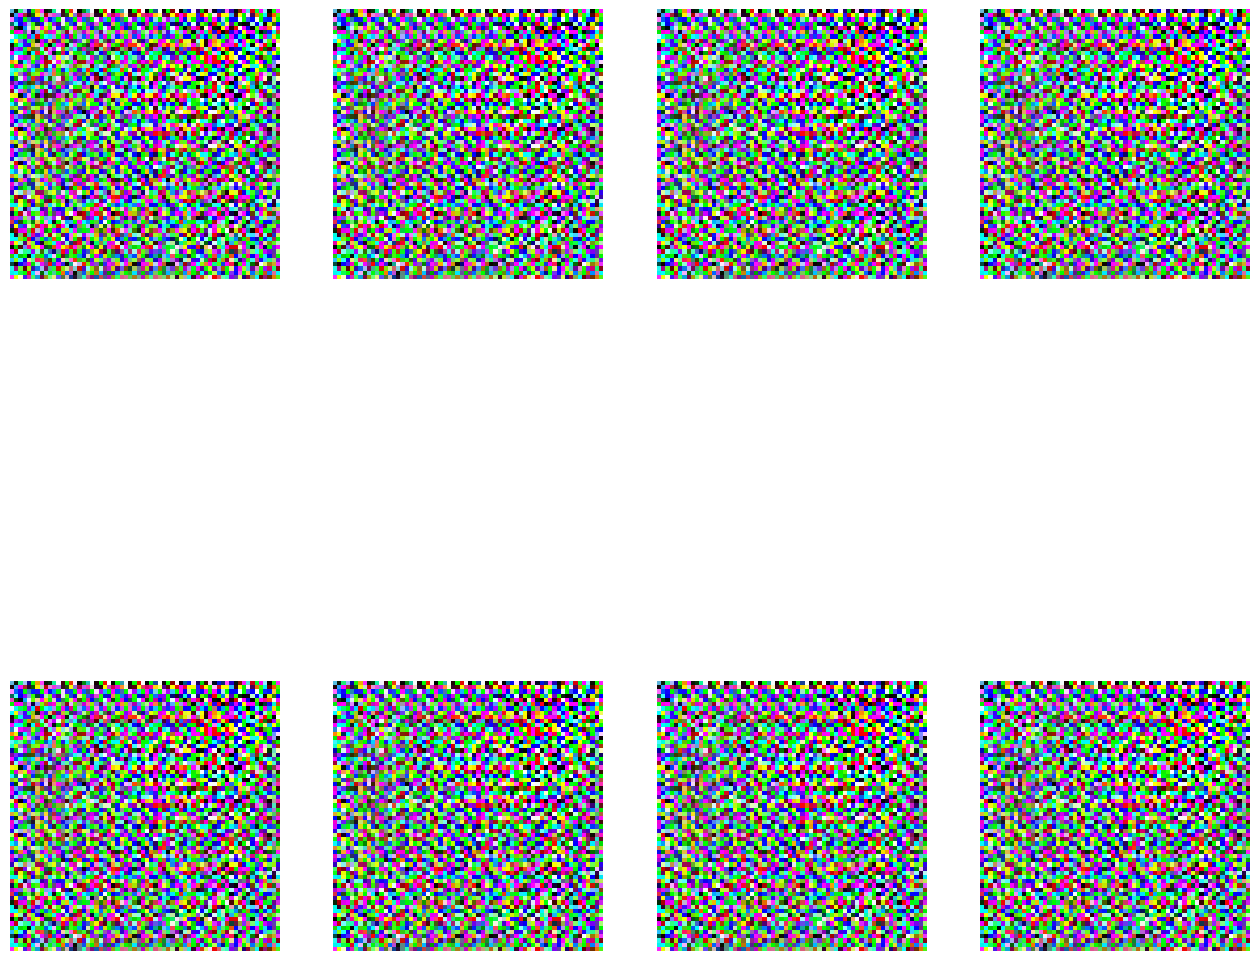

Training GAN:  80%|████████  | 12000/15000 [26:04<09:37,  5.19it/s]

Epoch 12000/15000, Discriminator Loss: 1.7986809015274048, GAN Loss: 33.90945816040039


Training GAN:  83%|████████▎ | 12501/15000 [27:15<17:02,  2.44it/s]

Epoch 12500/15000, Discriminator Loss: 6.162112712860107, GAN Loss: 46.42974853515625


Training GAN:  87%|████████▋ | 12999/15000 [28:24<03:57,  8.41it/s]

1/1 [==============================] - 0s 14ms/step


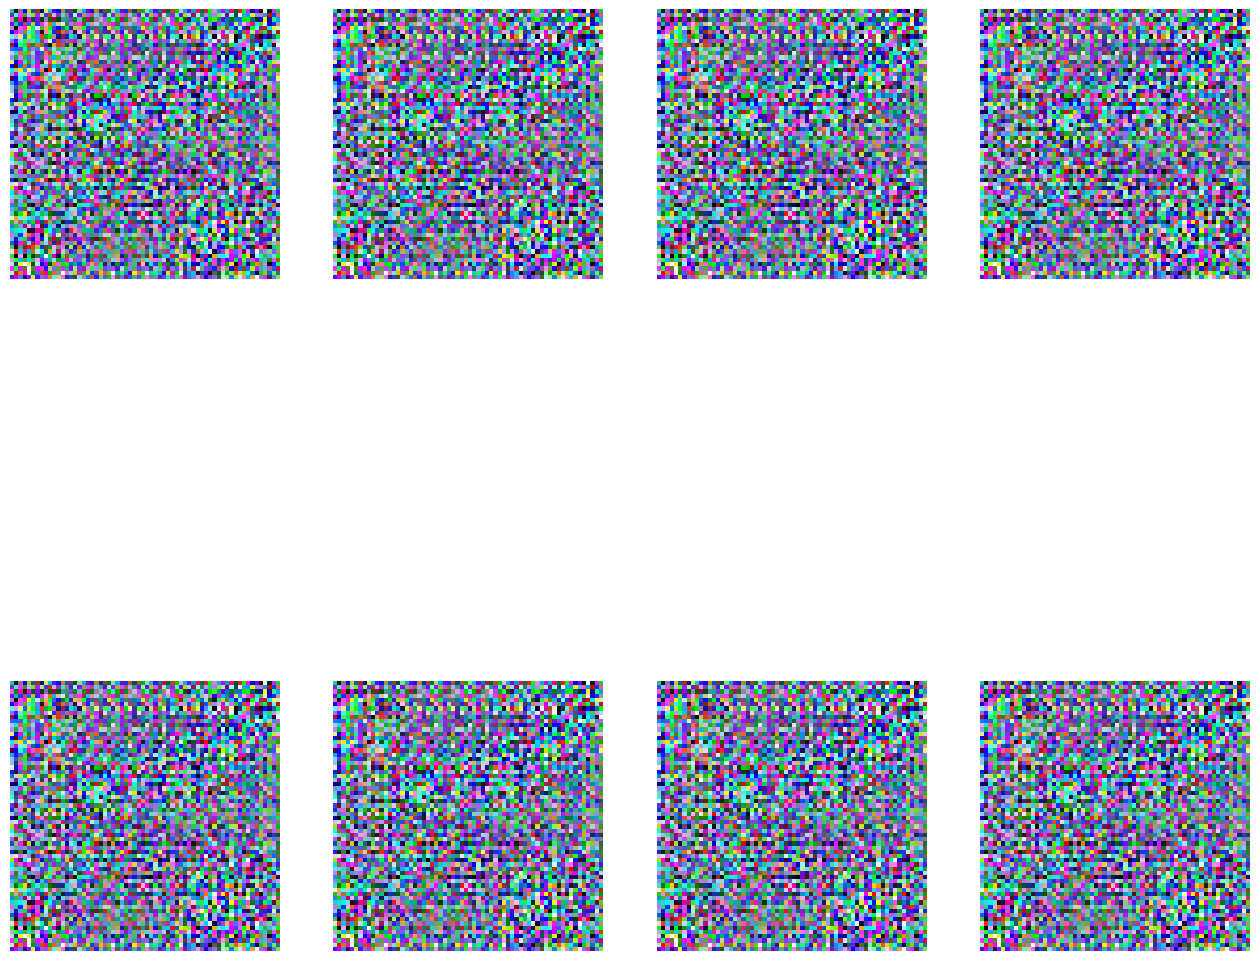

Training GAN:  87%|████████▋ | 13000/15000 [28:24<05:41,  5.86it/s]

Epoch 13000/15000, Discriminator Loss: 5.557247161865234, GAN Loss: 35.98119354248047


Training GAN:  90%|█████████ | 13501/15000 [29:29<03:21,  7.43it/s]

Epoch 13500/15000, Discriminator Loss: 0.7684236764907837, GAN Loss: 35.089996337890625


Training GAN:  93%|█████████▎| 13999/15000 [30:32<02:09,  7.76it/s]

1/1 [==============================] - 0s 16ms/step


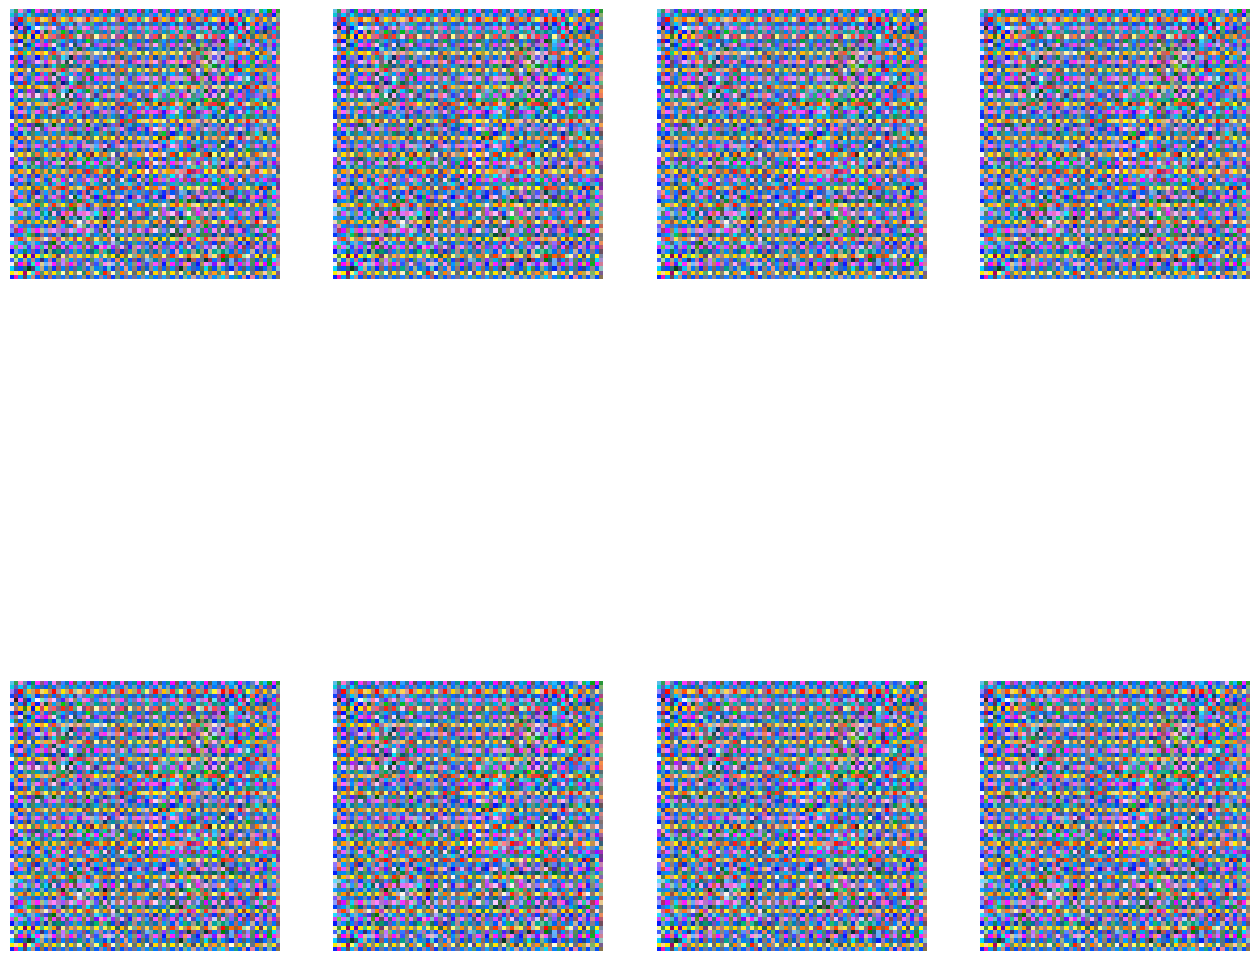

Training GAN:  93%|█████████▎| 14000/15000 [30:33<03:03,  5.45it/s]

Epoch 14000/15000, Discriminator Loss: 11.817527770996094, GAN Loss: 86.81038665771484


Training GAN:  97%|█████████▋| 14501/15000 [31:37<01:09,  7.17it/s]

Epoch 14500/15000, Discriminator Loss: 2.0720691680908203, GAN Loss: 75.86148071289062


Training GAN: 100%|█████████▉| 14999/15000 [32:44<00:00,  8.32it/s]

1/1 [==============================] - 0s 14ms/step


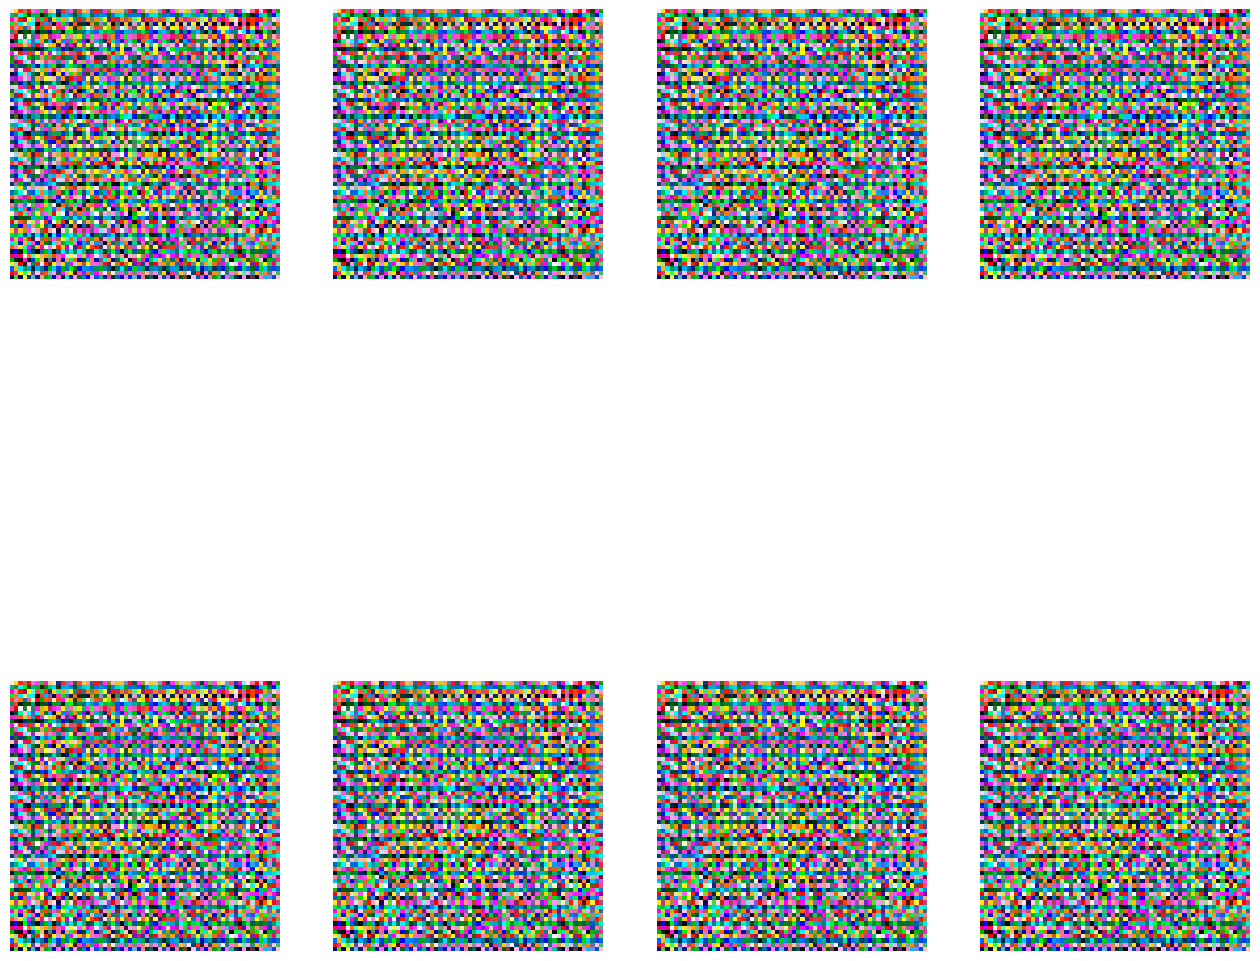

Training GAN: 100%|██████████| 15000/15000 [32:44<00:00,  7.64it/s]

Epoch 15000/15000, Discriminator Loss: 2.4433794021606445, GAN Loss: 65.38446044921875


In [5]:
# Обучение GAN
epochs = 15000
batch_size = 32
visualize_every = 500
visualize_every_images = 1000

d_losses, g_losses = [], []

# Прогресс-бар для эпох
for epoch in tqdm(range(epochs), desc="Training GAN"):
   # Генерация данных
   real_images = next(iter(dataset.batch(batch_size)))

   # Обучение дискриминатора
   random_data = generate_random_data(batch_size, random_dim)
   generated_images = generator(random_data, training=False)

   # Создание меток для дискриминатора
   real_labels = np.ones((batch_size, 1))
   fake_labels = np.zeros((batch_size, 1))

   # Обучение на реальных изображениях
   discriminator_loss_real = discriminator.train_on_batch(real_images, real_labels)
   # Обучение на сгенерированных изображениях
   discriminator_loss_fake = discriminator.train_on_batch(generated_images, fake_labels)

   # Обучение генератора
   random_data = generate_random_data(batch_size, random_dim)
   # Создание меток для генератора
   gan_labels = np.ones((batch_size, 1))
   gan_loss = gan.train_on_batch(random_data, gan_labels)

   d_losses.append(0.5 * (discriminator_loss_real + discriminator_loss_fake))
   g_losses.append(gan_loss)

   if (epoch + 1) % visualize_every_images == 0:
      # Визуализация результатов
      visualize_generated_images(generator, random_dim)

   # Выводим прогресс обучения
   if (epoch + 1) % visualize_every == 0:
      print(f"Epoch {epoch + 1}/{epochs}, Discriminator Loss: {d_losses[-1]}, GAN Loss: {g_losses[-1]}")


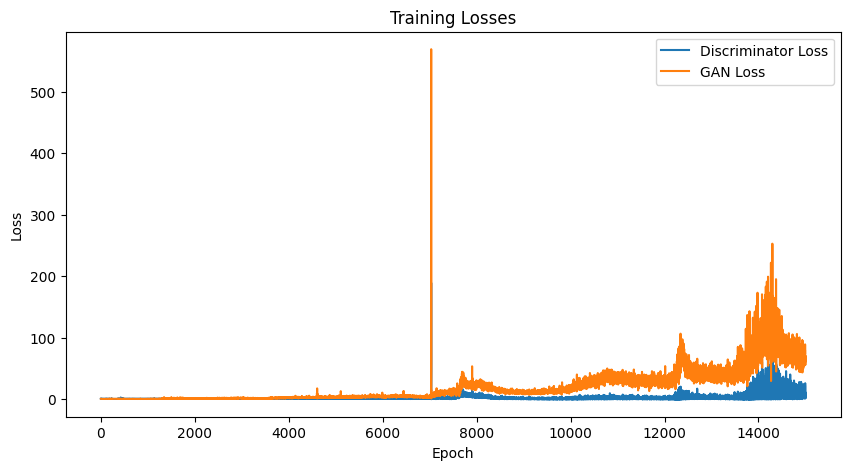

In [6]:

# Графики потерь
plt.figure(figsize=(10, 5))
plt.plot(d_losses, label="Discriminator Loss")
plt.plot(g_losses, label="GAN Loss")
plt.legend()
plt.title("Training Losses")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

1/1 [==============================] - 0s 99ms/step


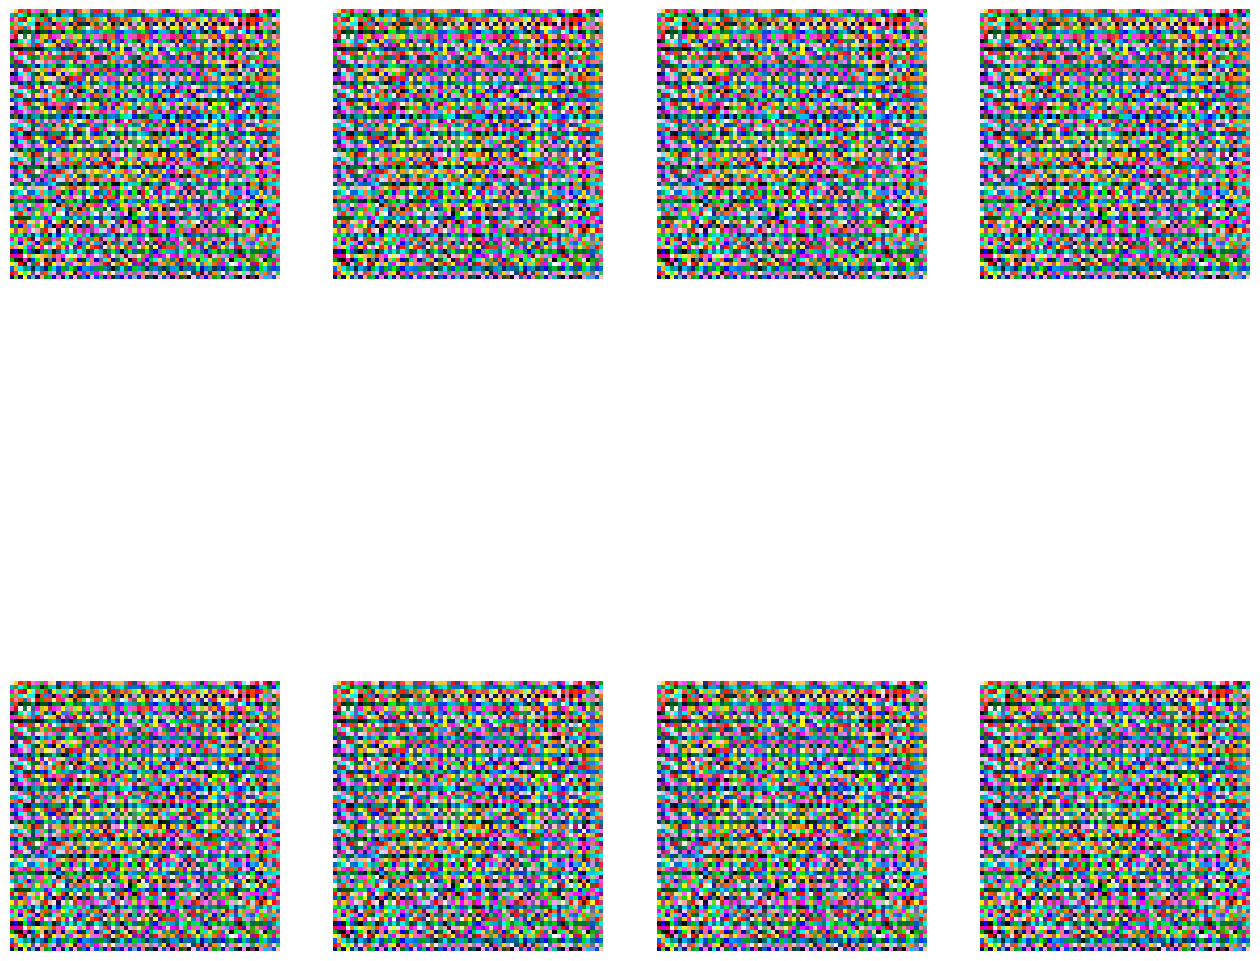

In [7]:
# # Сохранение модели
save_model(generator, "generator_model_pet.h5")

# Пример использования сохраненной модели
loaded_generator = load_saved_model("generator_model_pet.h5")
visualize_generated_images(loaded_generator, random_dim)

#### Рассмотрим несколько важных моментов, которые могут повлиять на работу GAN сети:

##### Архитектура сети: 
Выбранная архитектура GAN (Generator и Discriminator) может значительно влиять на качество генерируемых изображений. В  коде используется простая архитектура, которая может быть достаточно для простых задач, но для более сложных данных или более высокого качества изображений может потребоваться более сложная архитектура.

##### Оптимизатор и гиперпараметры: 
В  коде используется оптимизатор Adam с фиксированными гиперпараметрами. Выбор подходящего оптимизатора и настройка его гиперпараметров может значительно повлиять на скорость обучения и качество генерируемых изображений.

##### Тренировочные данные: 
В  коде используется набор данных "oxford_iiit_pet", который содержит изображения животных. Это может быть достаточно для обучения GAN, но для улучшения качества изображений могут потребоваться более сложные данные или данные, специфичные для вашей задачи.

##### Регуляризация: 
В  коде не используется регуляризация, что может привести к переобучению. Добавление регуляризации, такой как dropout или weight decay, может помочь предотвратить переобучение и улучшить обобщающую способность сети.

##### Размер батчей и количество эпох: 
В  коде используется размер батча 32 и 15000 эпох. Увеличение размера батча и количества эпох может улучшить стабильность обучения и качество генерируемых изображений.

##### Визуализация: 
В  коде есть функция для визуализации сгенерированных изображений. Это помогает в  отладке и мониторинге процесса обучения.

#### Вывод: 
Применение простой архитектуры GAN, оптимизации Adam с фиксированными гиперпараметрами, тренировки на небольшом наборе данных и отсутствии регуляризации может ограничить качество генерируемых изображений. Для улучшения качества и производительности можно рассмотреть более сложную архитектуру, использовать более сложные данные, добавить регуляризацию, увеличить размер батчей и количество эпох, а также использовать более сложные оптимизаторы с гиперпараметрами, настроенными для конкретных задач.